## Read data Reviews

In [1]:
#Read all the json files paths under the folder dummy_data/amazon_reviews, glob finds files in a folder
from glob2 import glob
jsonFiles = glob('dummy_data/amazon_reviews/**/*.json.gz')
print(jsonFiles)

['dummy_data/amazon_reviews\\partition_1\\part-00000-tid-9136122565017344171-3f98196e-e0c5-4bb5-90cc-d523170ef713-86080-1-c000.json.gz', 'dummy_data/amazon_reviews\\partition_2\\part-00000-tid-3563586395744623593-6cf89272-204c-4842-8213-a9fededc6c3e-86436-1-c000.json.gz']


In [23]:
#Create a single dataframe from all the json files
import pandas as pd
dfList = []
for jsonFile in jsonFiles:
    df = pd.read_json(jsonFile, lines=True,compression='gzip')
    dfList.append(df)
    
df_reviews = pd.concat(dfList, axis=0)

## Exploratory Data Analysis

In [ ]:
#Meaning of the columns:

## amazon_reviews:

""" 
reviewerID - ID of the reviewer, e.g. A2SUAM1J3GNN3B
asin - ID of the product, e.g. 0000013714
reviewerName - name of the reviewer
vote - helpful votes of the review
style - a disctionary of the product metadata, e.g., "Format" is "Hardcover"
reviewText - text of the review
overall - rating of the product
summary - summary of the review
unixReviewTime - time of the review (unix time)
reviewTime - time of the review (raw)
image - images that users post after they have received the product 
"""

## amazon_metadata:

"""
asin - ID of the product, e.g. 0000031852
title - name of the product
feature - bullet-point format features of the product
description - description of the product
price - price in US dollars (at time of crawl)
imageURL - url of the product image
imageURL - url of the high resolution product image
related - related products (also bought, also viewed, bought together, buy after viewing)
salesRank - sales rank information
brand - brand name
categories - list of categories the product belongs to
tech1 - the first technical detail table of the product
tech2 - the second technical detail table of the product
similar - similar product table
"""

In [24]:
df_reviews.shape

(111866, 11)

In [25]:
df_reviews.head()

,asin,overall,reviewText,reviewerID,reviewerName,summary,unixReviewTime,verified,style,vote,image
0,B00005QDPX,5,Crazy Taxi is by far one of the best video gam...,A36TDX8DY2XK5Q,Some Kid,It's Party Time! Let's Have Some Fun!,1054252800,false,NaN,NaN,NaN
1,B000MXIMKK,4,I love these pants!\n\nFor those of us who sla...,AZZ1YPRM2FAUH,David Colgrove,"Durable, good looking slacks at a reasonable p...",1459900800,true,"{""Size:"":"" 33W x 30L"",""Color:"":"" Graphite""}",6.0,NaN
2,B00005QDPX,2,Anyone who hasn't played this game should rent...,A3PASG15BRR40D,SleepyJD,A fun game that gets old too quickly,1049414400,false,NaN,NaN,NaN
3,B000MXIMKK,5,Great pants and nice crease.,A388UHKJN07JJT,TJK,Great Product,1459900800,true,"{""Size:"":"" 42W x 30L"",""Color:"":"" Black""}",NaN,NaN
4,B00005QDPX,4,In this game you choose a driver and car then ...,A29YLR71A42A3N,Amazon Customer,Fun and Entertaining,1040860800,false,NaN,3.0,NaN


In [26]:
#Check the number of unique values in each column
df_reviews.nunique(axis=0)

asin                4421
overall                5
reviewText        100433
reviewerID         91614
reviewerName       69822
summary            71093
unixReviewTime      6043
verified               2
style               4248
vote                 174
image                582
dtype: int64

In [27]:
#Check for number of missing values in columns
df_reviews.isna().sum()

asin                   0
overall                0
reviewText            52
reviewerID             0
reviewerName           0
summary               22
unixReviewTime         0
verified               0
style              49217
vote               88369
image             111252
dtype: int64

In [28]:
df_reviews[["overall","vote"]].describe()

,overall,vote
count,111866.000000,23497.000000
mean,4.196816,7.710601
std,1.224286,17.250685
min,1.000000,2.000000
25%,4.000000,2.000000
50%,5.000000,4.000000
75%,5.000000,7.000000
max,5.000000,646.000000


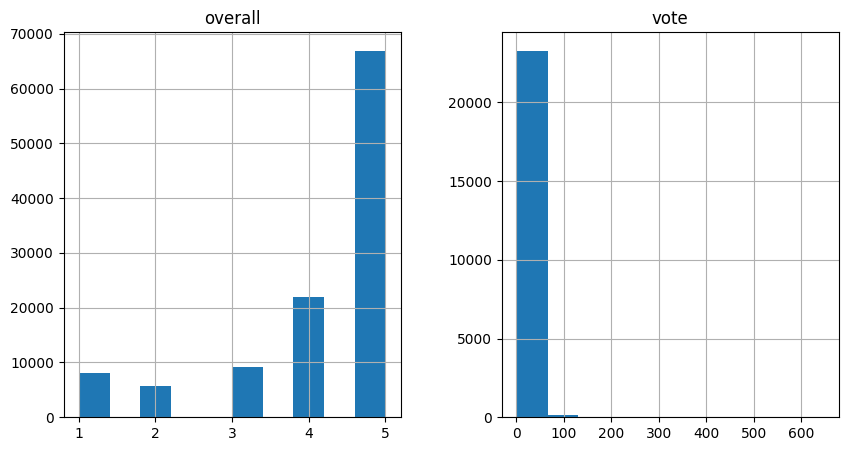

In [29]:
#Plot the histogram of the overall ratings and votes
df_reviews_hist = df_reviews[["overall","vote"]].hist(bins=10,figsize=(10,5))

In [20]:

# Group by product and calculate the mean and count of the overall ratings
df_scores = df_reviews.groupby('asin')['overall'].agg(['mean','count'])
df_scores

,mean,count
asin,,
B00002NB7E,5.000000,4
B00004YMG0,5.000000,1
B000050AUM,4.000000,1
B000052Y9J,4.500000,8
B00005Q8LY,4.231076,251
...,...,...
B00EIB2SM0,1.666667,3
B00EICO25U,1.000000,1
B00EID8OVC,4.666667,3


In [31]:
# Group by reviewer and calculate the mean and count of the overall ratings
df_reviews.groupby('reviewerID')['overall'].agg(['mean','count'])

,mean,count
reviewerID,,
A0155152VFGDKFFMJ4Y7,5.0,1
A0198067UBJPDLCUWNFG,5.0,1
A0220159ZRNBTRKLG08H,5.0,1
A0328927TA7ECTIKNP3G,5.0,1
A0362231G0D49Y5H52ES,5.0,2
...,...,...
AZZMZFFA8LQQ9,5.0,1
AZZONWXSDIU4H,4.0,1
AZZS2HDW5UKCX,4.0,1


In [43]:
# Get reviews text character count
reviewsText_count=df_reviews['reviewText'].str.len()
reviewsText_count

0        1126.0
1         528.0
2         190.0
3          28.0
4         507.0
          ...  
55928     151.0
55929     334.0
55930      29.0
55931     117.0
55932     326.0
Name: reviewText, Length: 111866, dtype: float64

In [49]:
reviewsText_count.describe()

count    111814.000000
mean        470.961355
std         791.536272
min           1.000000
25%          69.000000
50%         186.000000
75%         527.000000
max       28773.000000
Name: reviewText, dtype: float64

<Axes: >

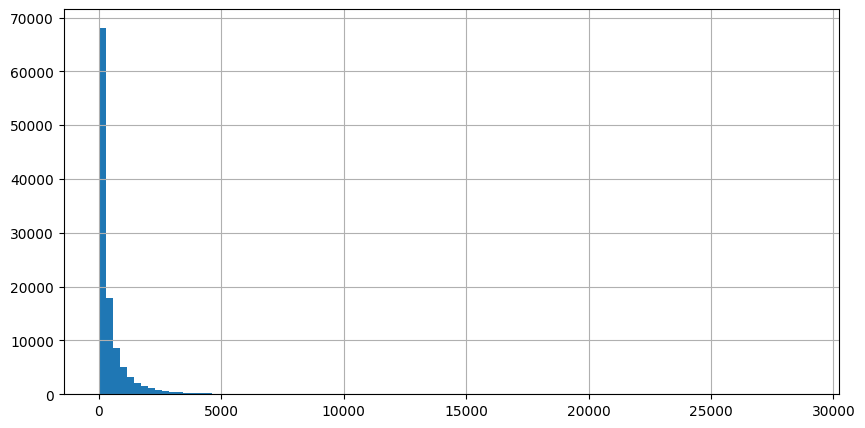

In [45]:
#Histogram of the reviews text character count
reviewsText_count.hist(bins=100,figsize=(10,5))

In [51]:
#Reviews text word count
reviewsText_word_count=df_reviews['reviewText'].str.split().str.len()
reviewsText_word_count

0        210.0
1         91.0
2         35.0
3          5.0
4         97.0
         ...  
55928     24.0
55929     57.0
55930      5.0
55931     20.0
55932     56.0
Name: reviewText, Length: 111866, dtype: float64

In [53]:
reviewsText_word_count.describe()

count    111814.000000
mean         86.860939
std         142.632248
min           1.000000
25%          13.000000
50%          35.000000
75%          99.000000
max        4960.000000
Name: reviewText, dtype: float64

<Axes: >

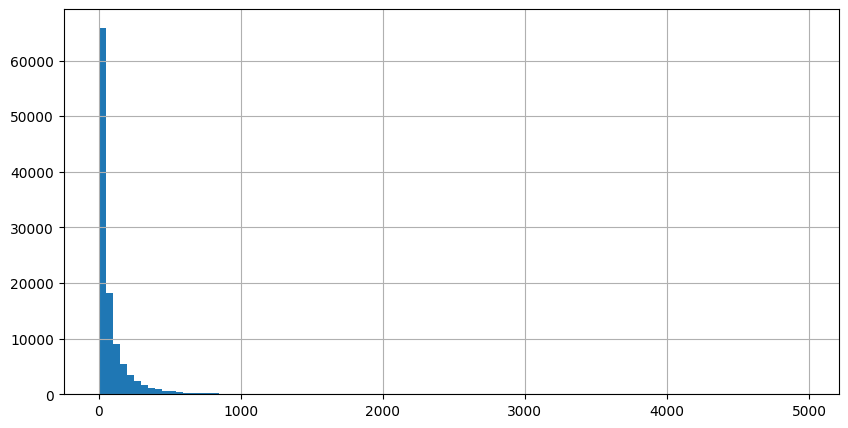

In [52]:
#Histogram of the reviews text word count
reviewsText_word_count.hist(bins=100,figsize=(10,5))

In [46]:
# Get reviews summary character count
summary_count=df_reviews['summary'].str.len()

In [48]:
summary_count.describe()

count    111844.000000
mean         22.882122
std          16.493535
min           1.000000
25%          10.000000
50%          18.000000
75%          31.000000
max         171.000000
Name: summary, dtype: float64

<Axes: >

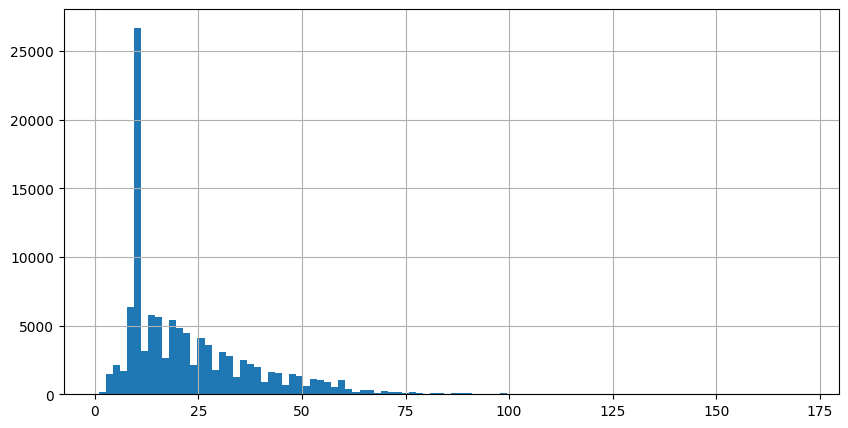

In [47]:

#Histogram of the reviews summary character count
summary_count.hist(bins=100,figsize=(10,5))

In [55]:
#Get reviews summary word count
summary_word_count=df_reviews['summary'].str.split().str.len()
summary_word_count

0        7.0
1        8.0
2        8.0
3        2.0
4        3.0
        ... 
55928    2.0
55929    4.0
55930    2.0
55931    1.0
55932    6.0
Name: summary, Length: 111866, dtype: float64

In [56]:
summary_word_count.describe()

count    111844.000000
mean          4.242972
std           3.170182
min           0.000000
25%           2.000000
50%           3.000000
75%           6.000000
max          31.000000
Name: summary, dtype: float64

<Axes: >

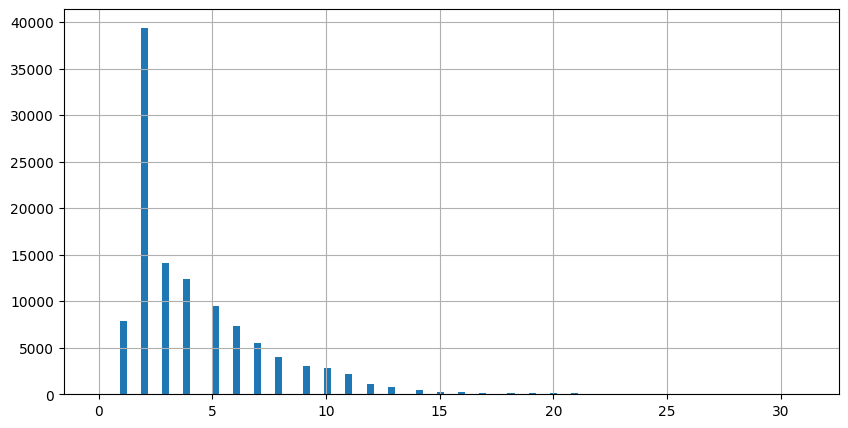

In [57]:
#Histogram of the reviews summary word count
summary_word_count.hist(bins=100,figsize=(10,5))